# Converting and Visualizing the datasets
TODO
1. Look at the big picture. x
2. Get the data. x
3. Discover and visualize the data to gain insights. x
4. Prepare the data for Machine Learning algorithms.

## Download and extract the datasets

In [7]:
# Lib
import gdown
import os
# download the dataset from Google Drive
file_id = "1BEnzsFtzhN0MnNoDie2BoAXVwtocVhA2" 

parent_dir = os.path.dirname(os.getcwd())
output = os.path.join(parent_dir, "datasets.zip")

# Create downloadable URL
url = f"https://drive.google.com/uc?id={file_id}"

# Download
gdown.download(url, output, quiet=False)

Downloading...
From (original): https://drive.google.com/uc?id=1BEnzsFtzhN0MnNoDie2BoAXVwtocVhA2
From (redirected): https://drive.google.com/uc?id=1BEnzsFtzhN0MnNoDie2BoAXVwtocVhA2&confirm=t&uuid=4826c765-d167-4bcf-bcf3-4c27df7e7707
To: d:\Code\python\text2quiz\datasets.zip
100%|██████████| 31.9M/31.9M [02:13<00:00, 238kB/s]


'd:\\Code\\python\\text2quiz\\datasets.zip'

In [15]:
import zipfile

# Thư mục giải nén đích
extract_path = os.path.dirname(os.getcwd())
os.makedirs(extract_path, exist_ok=True)  # tạo thư mục nếu chưa có

# Giải nén
zip_path = os.path.join(parent_dir, "datasets.zip")

with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

print(f"✅ Extracted to: {extract_path}")


✅ Extracted to: d:\Code\python\text2quiz


## Convert .parquet to .csv and json (if have)

In [11]:
# Library
import pandas as pd


# SqUAd Dataset path
SQUAD_PATH = "datasets/SQuAD2.0/raw"
# ViQuAD Dataset path
VIQUAD_PATH = "datasets/ViQuAD2.0/raw"

def convert_parquet_files(dataset_path):
    csv_output = os.path.join(dataset_path, "csv")
    json_output = os.path.join(dataset_path, "json")
    os.makedirs(csv_output, exist_ok=True)
    os.makedirs(json_output, exist_ok=True)

    for filename in os.listdir(dataset_path):
        if filename.endswith(".parquet"):
            file_path = os.path.join(dataset_path, filename)
            split_name = filename.replace(".parquet", "")
            
            # Read parquet
            df = pd.read_parquet(file_path)

            # Save CSV
            df.to_csv(os.path.join(csv_output, f"{split_name}.csv"), index=False)

            # Save JSON
            df.to_json(os.path.join(json_output, f"{split_name}.json"), orient="records", lines=True)

            print(f"✅ Converted {filename} → CSV & JSON in {dataset_path}")

In [12]:
# Convert SQuAD dataset
convert_parquet_files(SQUAD_PATH)

In [13]:
# Convert ViQuAD dataset
convert_parquet_files(VIQUAD_PATH)

## Visualize data

In [19]:
# Load train data from CSV
squad_df = pd.read_csv("../datasets/SQuAD2.0/raw/csv/train.csv")
viquad_df = pd.read_csv("../datasets/ViQuAD2.0/raw/csv/train.csv")

# Overview of the datasets
print("SQuAD:")
print(squad_df.info())
print(squad_df.describe(include='all'))

SQuAD:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 130319 entries, 0 to 130318
Data columns (total 5 columns):
 #   Column    Non-Null Count   Dtype 
---  ------    --------------   ----- 
 0   id        130319 non-null  object
 1   title     130319 non-null  object
 2   context   130319 non-null  object
 3   question  130319 non-null  object
 4   answers   130319 non-null  object
dtypes: object(5)
memory usage: 5.0+ MB
None
                              id           title  \
count                     130319          130319   
unique                    130319             442   
top     5a7e070b70df9f001a87543d  Queen_Victoria   
freq                           1             883   

                                                  context  \
count                                              130319   
unique                                              19029   
top     In 1853, Victoria gave birth to her eighth chi...   
freq                                                   30   

In [20]:
print("\nViQuAD:")
print(viquad_df.info())
print(viquad_df.describe(include='all'))


ViQuAD:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28454 entries, 0 to 28453
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id                 28454 non-null  object
 1   uit_id             28454 non-null  object
 2   title              28454 non-null  object
 3   context            28454 non-null  object
 4   question           28454 non-null  object
 5   answers            28454 non-null  object
 6   is_impossible      28454 non-null  bool  
 7   plausible_answers  9216 non-null   object
dtypes: bool(1), object(7)
memory usage: 1.5+ MB
None
                    id      uit_id                   title  \
count            28454       28454                   28454   
unique           28454       28454                     138   
top     0138-0223-0007  uit_028457  Chiến tranh Đông Dương   
freq                 1           1                    1412   

                                                

In [21]:
# An instance of SQuAD dataset
print("\nSQuAD Sample:")
print(squad_df.iloc[0])
# An instance of ViQuAD dataset
print("\nViQuAD Sample:")
print(viquad_df.iloc[0])


SQuAD Sample:
id                                   56be85543aeaaa14008c9063
title                                                 Beyoncé
context     Beyoncé Giselle Knowles-Carter (/biːˈjɒnseɪ/ b...
question             When did Beyonce start becoming popular?
answers     {'text': array(['in the late 1990s'], dtype=ob...
Name: 0, dtype: object

ViQuAD Sample:
id                                                      0001-0001-0001
uit_id                                                      uit_000001
title                                                    Phạm Văn Đồng
context              Phạm Văn Đồng (1 tháng 3 năm 1906 – 29 tháng 4...
question             Tên gọi nào được Phạm Văn Đồng sử dụng khi làm...
answers              {'text': array(['Lâm Bá Kiệt'], dtype=object),...
is_impossible                                                    False
plausible_answers                                                  NaN
Name: 0, dtype: object


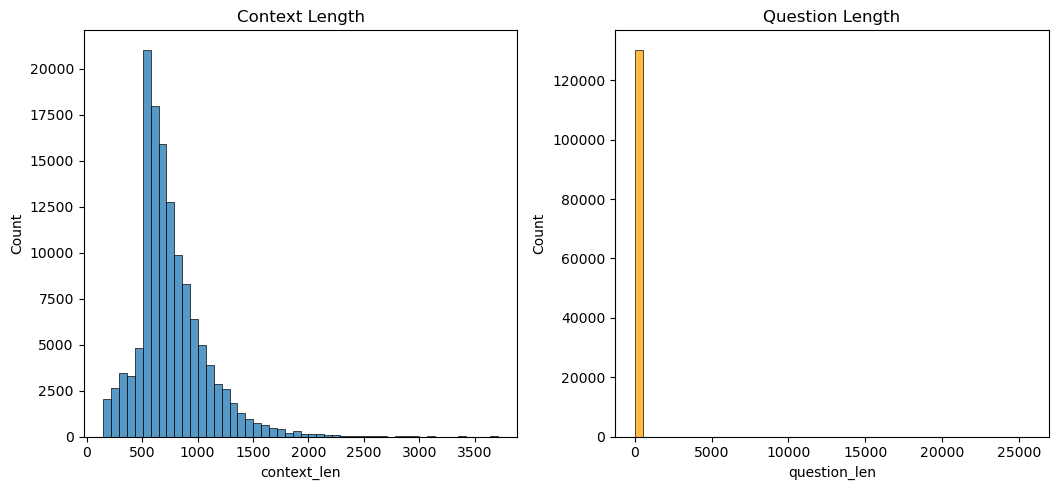

In [22]:
squad_df["context_len"] = squad_df["context"].str.len()
squad_df["question_len"] = squad_df["question"].str.len()


# Histogram
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(16, 5))

plt.subplot(1, 3, 1)
sns.histplot(squad_df["context_len"], bins=50)
plt.title("Context Length")

plt.subplot(1, 3, 2)
sns.histplot(squad_df["question_len"], bins=50, color='orange')
plt.title("Question Length")

# plt.subplot(1, 3, 3)
# sns.histplot(squad_df["answer_len"], bins=50, color='green')
# plt.title("Answer Length")

plt.tight_layout()
plt.show()


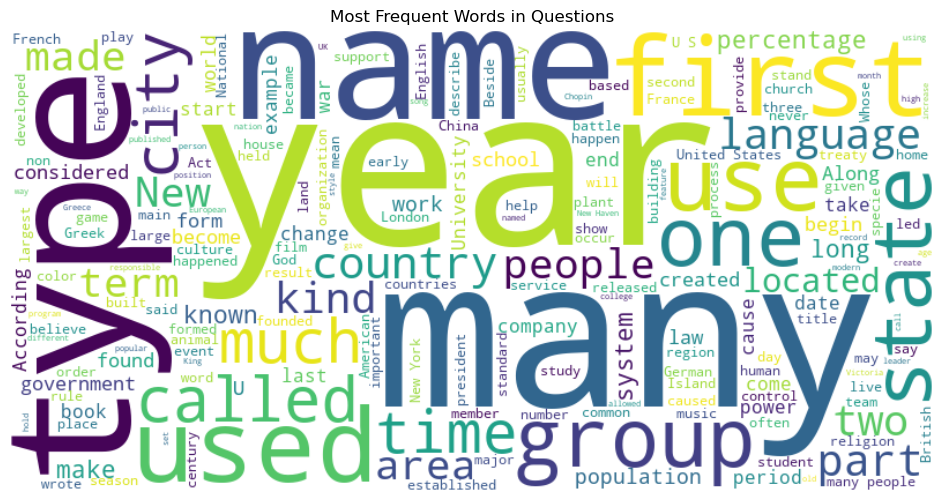

In [23]:
from wordcloud import WordCloud

text = " ".join(squad_df["question"].dropna().tolist())
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

plt.figure(figsize=(12, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title("Most Frequent Words in Questions")
plt.show()


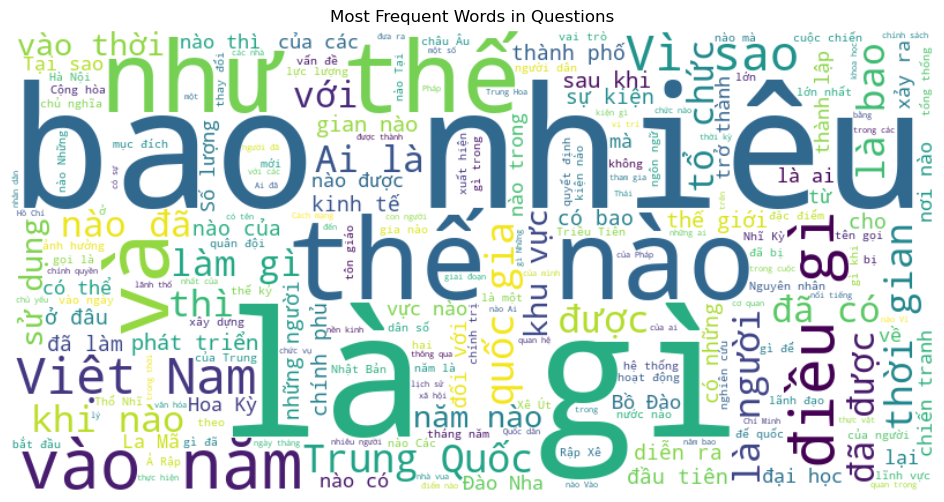

In [24]:
text = " ".join(viquad_df["question"].dropna().tolist())
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

plt.figure(figsize=(12, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title("Most Frequent Words in Questions")
plt.show()


In [25]:
print("SQuAD Dataset Statistics:")
print("Total instances:", len(squad_df))
print("Unique questions:", squad_df["question"].nunique())
print("Duplicate questions:", squad_df["question"].duplicated().sum())
print("Unique contexts:", squad_df["context"].nunique())
print("\nViQuAD Dataset Statistics:")
print("Total instances:", len(viquad_df))
print("Unique questions:", viquad_df["question"].nunique())
print("Duplicate questions:", viquad_df["question"].duplicated().sum())
print("Unique contexts:", viquad_df["context"].nunique())

SQuAD Dataset Statistics:
Total instances: 130319
Unique questions: 130217
Duplicate questions: 102
Unique contexts: 19029

ViQuAD Dataset Statistics:
Total instances: 28454
Unique questions: 28451
Duplicate questions: 3
Unique contexts: 4101
